In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import expon
from fitter import Fitter

In [17]:
display_max_columns = None
pd.set_option('display.max_columns', display_max_columns)

In [18]:
caminho_arquivo = r'C:\Users\Administrador\Documents\GitHub\TJGO_CienciaDeDados\microdados_censo_escolar_2024\dados\microdados_ed_basica_2024_tratado.csv'
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1', low_memory=False)

In [19]:
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1', low_memory=False)
colunas_escolhidas = ['CO_ENTIDADE',
 'NO_ENTIDADE',
 'NO_REGIAO',
 'CO_REGIAO',
 'NO_UF',
 'SG_UF',
 'CO_UF',
 'NO_MUNICIPIO',
 'CO_MUNICIPIO',
 'TP_DEPENDENCIA',
 'TP_CATEGORIA_ESCOLA_PRIVADA',
 'TP_LOCALIZACAO',
 'TP_LOCALIZACAO_DIFERENCIADA',
 'TP_SITUACAO_FUNCIONAMENTO',
 'IN_PREDIO_COMPARTILHADO',
 'CO_ORGAO_REGIONAL',
 'CO_ESCOLA_SEDE_VINCULADA',
 'CO_IES_OFERTANTE',
 'QT_MAT_BAS',
 'QT_MAT_INF',
 'QT_MAT_INF_CRE',
 'QT_MAT_INF_PRE',
 'QT_MAT_FUND',
 'QT_MAT_FUND_AI',
 'QT_MAT_FUND_AF',
 'QT_MAT_MED',
 'QT_MAT_BAS_FEM',
 'QT_MAT_BAS_MASC',
 'QT_MAT_BAS_ND',
 'QT_MAT_BAS_BRANCA',
 'QT_MAT_BAS_PRETA',
 'QT_MAT_BAS_PARDA',
 'QT_MAT_BAS_AMARELA',
 'QT_MAT_BAS_INDIGENA',
 'QT_MAT_INF_INT',
 'QT_MAT_INF_CRE_INT',
 'QT_MAT_INF_PRE_INT',
 'QT_MAT_FUND_INT',
 'QT_MAT_FUND_AI_INT',
 'QT_MAT_FUND_AF_INT',
 'QT_MAT_MED_INT',
 'QT_MAT_ZR_URB',
 'QT_MAT_ZR_RUR',
 'QT_MAT_ZR_NA',
 'IN_INTERNET',
 'IN_BANDA_LARGA',
 'IN_INTERNET_ALUNOS',
 'IN_ACESSO_INTERNET_COMPUTADOR',
 'IN_ACES_INTERNET_DISP_PESSOAIS',
 'TP_REDE_LOCAL',
 'IN_LABORATORIO_INFORMATICA',
 'QT_DESKTOP_ALUNO',
 'QT_COMP_PORTATIL_ALUNO',
 'QT_TABLET_ALUNO',
 'IN_LOCAL_FUNC_PREDIO_ESCOLAR',
 'TP_OCUPACAO_PREDIO_ESCOLAR',
 'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
 'IN_LOCAL_FUNC_UNID_PRISIONAL',
 'IN_LOCAL_FUNC_PRISIONAL_SOCIO',
 'IN_LOCAL_FUNC_GALPAO',
 'TP_OCUPACAO_GALPAO',
 'IN_LOCAL_FUNC_SALAS_OUTRA_ESC',
 'IN_LOCAL_FUNC_OUTROS',
 'NU_ANO_CENSO',
 'DT_ANO_LETIVO_INICIO',
 'DT_ANO_LETIVO_TERMINO',
 'DURACAO_EM_DIAS']

In [20]:
df_filtrado = df[colunas_escolhidas]

df_filtrado = df_filtrado.copy()

# Substituir '88888.0' por np.nan
df_filtrado['QT_DESKTOP_ALUNO'] = df_filtrado['QT_DESKTOP_ALUNO'].replace(88888.0, np.nan)
df_filtrado['QT_COMP_PORTATIL_ALUNO'] = df_filtrado['QT_COMP_PORTATIL_ALUNO'].replace(88888.0, np.nan)
df_filtrado['QT_TABLET_ALUNO'] = df_filtrado['QT_TABLET_ALUNO'].replace(88888.0, np.nan)

df_infra_tec = df_filtrado[['TP_DEPENDENCIA','NO_REGIAO','TP_LOCALIZACAO',
                            'QT_DESKTOP_ALUNO','QT_COMP_PORTATIL_ALUNO',
                            'QT_TABLET_ALUNO']]

In [21]:
# Certifique-se de que seu dataframe df_infra_tec está carregado e tratado
# Para reprodutibilidade, vamos remover NaNs de uma coluna que usaremos bastante
df_infra_tec_limpo = df_infra_tec.dropna(subset=['QT_DESKTOP_ALUNO']).copy()

# Definindo um tamanho de amostra padrão para a Questão 1
TAMANHO_AMOSTRA = 1000

In [22]:
# a) Amostragem Aleatória Simples
amostra_simples = df_infra_tec_limpo.sample(n=TAMANHO_AMOSTRA, random_state=42)
media_simples = amostra_simples['QT_DESKTOP_ALUNO'].mean()

print(f"Média de Desktops (Amostragem Simples): {media_simples:.2f}")

Média de Desktops (Amostragem Simples): 6.09


In [23]:
# b) Amostragem Sistemática
tamanho_populacao = len(df_infra_tec_limpo)
k = tamanho_populacao // TAMANHO_AMOSTRA
start_index = np.random.randint(0, k)
indices_sistematicos = np.arange(start_index, tamanho_populacao, step=k)
amostra_sistematica = df_infra_tec_limpo.iloc[indices_sistematicos]
media_sistematica = amostra_sistematica['QT_DESKTOP_ALUNO'].mean()

print(f"Média de Desktops (Amostragem Sistemática): {media_sistematica:.2f}")

Média de Desktops (Amostragem Sistemática): 5.55


In [24]:
# c) Amostragem Estratificada (estratificando por 'NO_REGIAO')
_, amostra_estratificada = train_test_split(
    df_infra_tec_limpo,
    test_size=TAMANHO_AMOSTRA,
    stratify=df_infra_tec_limpo['NO_REGIAO'],
    random_state=42
)
media_estratificada = amostra_estratificada['QT_DESKTOP_ALUNO'].mean()

print(f"Média de Desktops (Amostragem Estratificada): {media_estratificada:.2f}")

Média de Desktops (Amostragem Estratificada): 5.14


In [25]:
# d) Amostragem por Conglomerados (usando 'NO_MUNICIPIO' como cluster)
# Precisamos do df_filtrado que contém a coluna do município
df_filtrado_limpo = df_filtrado.dropna(subset=['QT_DESKTOP_ALUNO']).copy()

# Identificar os clusters únicos (municípios)
municipios = df_filtrado_limpo['NO_MUNICIPIO'].unique()

# Sortear 50 municípios para formar nossa amostra
clusters_sorteados = np.random.choice(municipios, size=50, replace=False)

# Selecionar todas as escolas dos municípios sorteados
amostra_conglomerado = df_filtrado_limpo[df_filtrado_limpo['NO_MUNICIPIO'].isin(clusters_sorteados)]
media_conglomerado = amostra_conglomerado['QT_DESKTOP_ALUNO'].mean()

print(f"Tamanho da amostra por conglomerado: {len(amostra_conglomerado)} escolas")
print(f"Média de Desktops (Amostragem por Conglomerado): {media_conglomerado:.2f}")

Tamanho da amostra por conglomerado: 1931 escolas
Média de Desktops (Amostragem por Conglomerado): 4.65


Tamanho da amostra: 1557 escolas: Este é um ponto crucial da amostragem por conglomerados. O tamanho final da amostra não é fixo; ele é o resultado da amostragem. As 50 cidades sorteadas continham, no total, 1.557 escolas.

Média de Desktops: 4.16: Esta é a média de desktops por aluno para todas as 1.557 escolas localizadas naqueles 50 municípios. O resultado (4.16) é notavelmente mais baixo que os outros. Isso pode ter acontecido, por acaso, se os 50 municípios sorteados tiverem, em média, menos recursos que a média nacional. Isso expõe a principal característica da amostragem por conglomerado: ela pode ter uma variabilidade maior, pois o resultado depende muito da "sorte" de quais conglomerados são selecionados.

In [26]:
# e) Cálculo do Tamanho da Amostra
import math

confianca = 0.95
p = 0.5
margem_erro = 0.03
z_score = 1.96 # Z-score para 95% de confiança

n = (z_score**2 * p * (1 - p)) / (margem_erro**2)
tamanho_suficiente = math.ceil(n)

print(f"Com nível de confiança de {confianca*100}% e margem de erro de {margem_erro*100}%,")
print(f"o tamanho de amostra suficiente seria de: {tamanho_suficiente} observações.")

Com nível de confiança de 95.0% e margem de erro de 3.0%,
o tamanho de amostra suficiente seria de: 1068 observações.


"Qual o tamanho mínimo da amostra que eu preciso para ter resultados confiáveis?".

Para isso, a fórmula padrão para calcular o tamanho da amostra para uma proporção, baseada em três parâmetros-chave:

Nível de Confiança (95%): Define o grau de certeza que você quer ter nos seus resultados. 95% é um padrão muito comum em pesquisas e significa que, se você repetisse a amostragem 100 vezes, em 95 delas o resultado da sua amostra refletiria o resultado da população dentro da margem de erro.

Margem de Erro (3%): Define a precisão desejada. Significa que você aceita que a sua estimativa final (ex: a média de desktops) possa variar até 3 pontos percentuais para mais ou para menos do valor real da população.

Proporção p (0.5): Esta é a escolha mais conservadora e segura. Ao usar p=0.5, você está assumindo a "pior" situação possível, de máxima variabilidade nos dados (como um resultado de 50/50 em uma pesquisa de "sim" ou "não"). Isso garante que o tamanho da amostra calculado seja grande o suficiente, independentemente da verdadeira distribuição dos dados.

O código então aplica esses valores na fórmula e usa math.ceil para arredondar o resultado para o próximo número inteiro, pois não é possível ter uma "fração" de observação.

O Que o Resultado 1068 Significa?
O resultado de 1068 observações é o tamanho de amostra mínimo que você precisaria coletar para poder fazer afirmações sobre a população inteira com 95% de confiança e uma margem de erro de 3%.

Conexão com a sua Atividade (Ponto Mais Importante)
Nas suas amostragens anteriores (Simples, Sistemática e Estratificada), você utilizou TAMANHO_AMOSTRA = 1000.

Tamanho Utilizado: 1000 escolas

Tamanho Suficiente Calculado: 1068 escolas

Análise: O tamanho da amostra que você usou (1000) é muito próximo, mas um pouco menor que o tamanho calculado como ideal (1068) para uma margem de erro de 3%.

O que isso implica? Isso não invalida seu trabalho anterior! Apenas significa que a margem de erro real das suas amostras de tamanho 1000 é um pouco maior do que 3% (seria em torno de 3.1%).

Esta é uma excelente observação para incluir no seu relatório final (item f) Comente e compare os resultados), pois mostra que você entende a relação entre o tamanho da amostra e a confiabilidade estatística dos resultados.

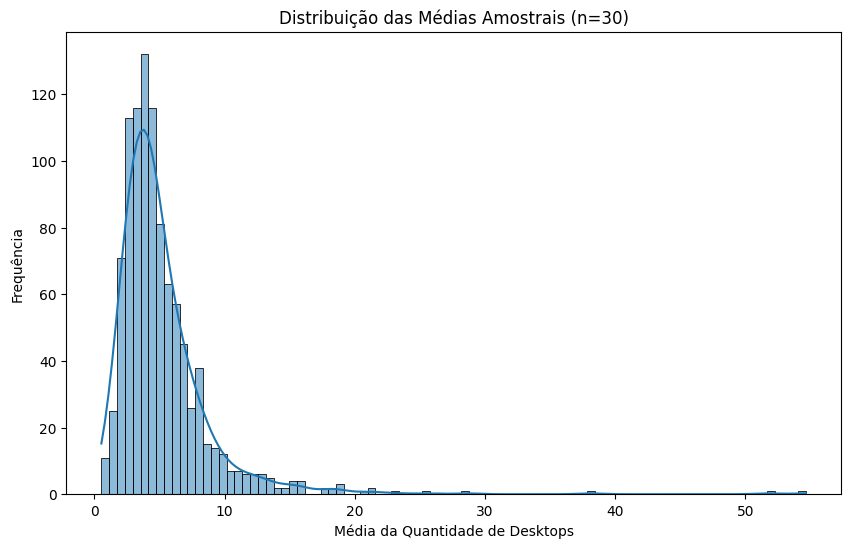

In [27]:
# 2) Histograma das médias de amostras de tamanho 30
medias_amostra_n30 = []
for _ in range(1000): # Tirando 1.000 amostras
    amostra = df_infra_tec_limpo['QT_DESKTOP_ALUNO'].sample(n=30)
    medias_amostra_n30.append(amostra.mean())

# Plotar o histograma das médias
plt.figure(figsize=(10, 6))
sns.histplot(medias_amostra_n30, kde=True)
plt.title('Distribuição das Médias Amostrais (n=30)')
plt.xlabel('Média da Quantidade de Desktops')
plt.ylabel('Frequência')
plt.show()

Em resumo, esse gráfico é a prova visual de que, mesmo pegando amostras pequenas e aleatórias, as médias dessas amostras se comportam de maneira previsível e se agrupam em torno da verdadeira média da população, seguindo uma Distribuição Normal.

In [28]:
# 3) Comparar médias para n=10, 100, 1000
media_populacao = df_infra_tec_limpo['QT_DESKTOP_ALUNO'].mean()

amostra_n10 = df_infra_tec_limpo['QT_DESKTOP_ALUNO'].sample(n=10, random_state=42).mean()
amostra_n100 = df_infra_tec_limpo['QT_DESKTOP_ALUNO'].sample(n=100, random_state=42).mean()
amostra_n1000 = df_infra_tec_limpo['QT_DESKTOP_ALUNO'].sample(n=1000, random_state=42).mean()

print(f"Média Real da População: {media_populacao:.2f}")
print(f"Média da Amostra (n=10):   {amostra_n10:.2f}")
print(f"Média da Amostra (n=100):  {amostra_n100:.2f}")
print(f"Média da Amostra (n=1000): {amostra_n1000:.2f}")

Média Real da População: 5.18
Média da Amostra (n=10):   3.70
Média da Amostra (n=100):  3.93
Média da Amostra (n=1000): 6.09


Quanto maior o tamanho da amostra, mais a média da amostra tende a se aproximar da média real da população.

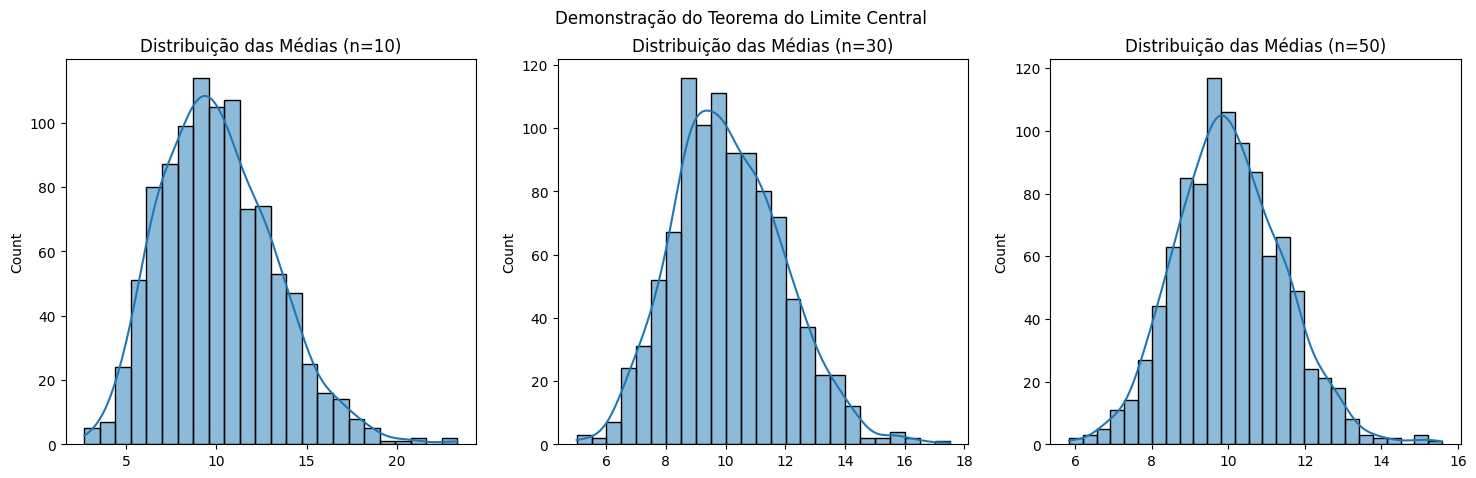

In [29]:
# 4) Teorema do Limite Central com Distribuição Exponencial
# Gerar uma população com distribuição exponencial
populacao_exp = expon.rvs(scale=10, size=10000)

# Tamanhos de amostra a serem testados
tamanhos_amostra = [10, 30, 50]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, n in enumerate(tamanhos_amostra):
    medias_amostrais = []
    for _ in range(1000): # Gerar 1000 amostras
        amostra = np.random.choice(populacao_exp, size=n)
        medias_amostrais.append(amostra.mean())
    
    # Plotar o histograma das médias
    sns.histplot(medias_amostrais, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição das Médias (n={n})')

plt.suptitle('Demonstração do Teorema do Limite Central')
plt.show()

Esta demonstração ilustra os dois efeitos mais importantes do Teorema do Limite Central:

A Convergência para a Normalidade:
Não importa o quão assimétrica ou "estranha" seja a distribuição da população original (neste caso, uma exponencial), a distribuição das médias das amostras retiradas dela se aproximará cada vez mais de uma Distribuição Normal à medida que o tamanho da amostra (n) aumenta.

A Redução da Variabilidade:
Observe como os gráficos mudam do n=10 para o n=50. A "curva de sino" se torna progressivamente mais alta e mais estreita. Isso significa que, com amostras maiores, as médias amostrais se agrupam de forma muito mais consistente em torno da média real da população (que no código é scale=10). Em outras palavras, a estimativa se torna mais precisa e confiável.

                    sumsquare_error           aic           bic  kl_div  \
halflogistic               0.000015  29348.927254  29369.488232     inf   
genhalflogistic            0.000055  25159.361872  25190.203338     inf   
laplace_asymmetric         0.000244  28466.702471  28497.543937     inf   
genexpon                   0.000244  28472.121830  28523.524274     inf   
expon                      0.000244  28466.541709  28487.102686     inf   

                    ks_statistic  ks_pvalue  
halflogistic            0.829079        0.0  
genhalflogistic         0.812868        0.0  
laplace_asymmetric      0.829079        0.0  
genexpon                0.829079        0.0  
expon                   0.829079        0.0  


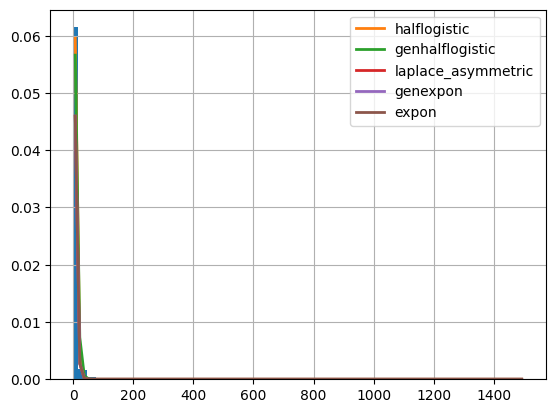

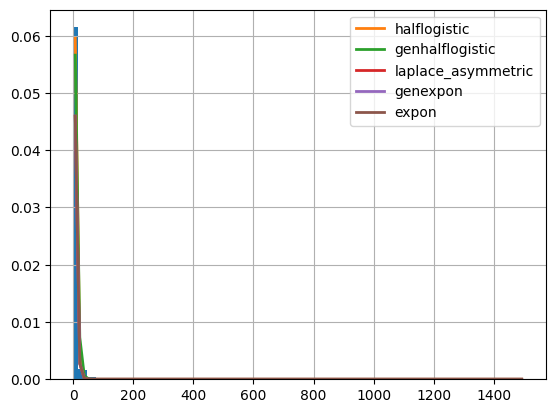

In [30]:
# 1. Select the numerical column you want to analyze
# Make sure to drop any rows with missing values (NaN) for this column
dados_para_ajuste = df_infra_tec['QT_TABLET_ALUNO'].dropna()

# 2. Create the Fitter object and run the analysis
# This will test your data against 80 common distributions
f = Fitter(dados_para_ajuste, timeout=120) # Added a timeout of 120 seconds
f.fit()

# 3. Print the summary table ranking the best distributions
print(f.summary())

# 4. Visualize the results
plt.figure()
f.summary() # This command also plots the top distributions over your data's histogram
plt.show()

A Realidade dos Dados: A distribuição da quantidade de tablets nas escolas está longe de ser "Normal" (a famosa curva de sino). O cenário mais comum, de longe, é uma escola ter pouquíssimos ou nenhum tablet.

Confirmação pelo Fitter: A análise do fitter confirma essa observação visual, pois as distribuições que ele classificou como as melhores (halflogistic, expon, etc.) são todas caracterizadas por esse decaimento rápido a partir de um pico inicial.

Implicações Práticas: Este resultado é muito relevante. Ele sugere que qualquer análise estatística ou modelo preditivo que você fosse criar com esses dados precisaria levar em conta essa natureza assimétrica e concentrada em zero. Usar um método que pressupõe uma distribuição normal, por exemplo, levaria a conclusões completamente equivocadas.